注：本系列所有博客将持续更新并发布在[github](https://github.com/ChenHuabin321/tensorflow2_tutorials)上，您可以通过[github](https://github.com/ChenHuabin321/tensorflow2_tutorials)下载本系列所有文章笔记文件。

# 1 神器级的TensorBoard

TensorBoard是TensorFlow中的又一神器级工具，想用户提供了模型可视化的功能。我们都知道，在构建神经网络模型时，只要模型开始训练，很多细节对外界来说都是不可见的，参数如何变化，准确率怎么样了，loss还在减小吗，这些问题都很难弄明白。但是，TensorBoard通过结合web应用为我们提供了这一功能，它将模型训练过程的细节以图表的形式通过浏览器可视化得展现在我们眼前，通过这种方式我们可以清晰感知weight、bias、accuracy的变化，把握训练的趋势。

本文介绍两种使用TensorBoard的方式。不过，无论使用那种方式，请先启动TensorBoard的web应用，这个web应用读取模型训练时的日志数据，每隔30秒更新到网页端。在TensorFlow2.0中，TensorBoard是默认安装好的，所以，可以直接根据以下命令启动：

tensorboard --logdir "/home/chb/jupyter/logs"

logdir指的是日志目录，每次训练模型时，TensorBoard会在日志目录中创建一个子目录，在其中写入日志，TensorBoard的web应用正是通过日志来感知模型的训练状态，然后更新到网页端。

如果命令成功运行，可以通过本地的6006端口打开网页，但是，此时打开的页面时下面这个样子,因为还没有开始训练模型，更没有将日志写入到指定的目录。

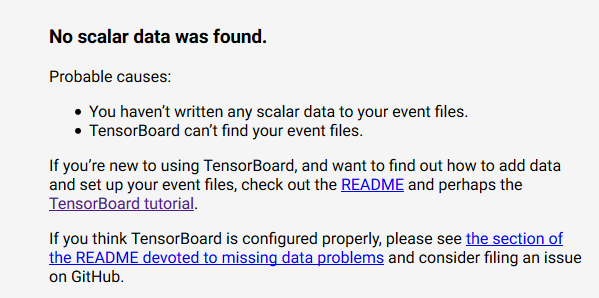

要将训练数据写入指定目录就必须将TensorBoard嵌入模型的训练过程，TensorFlow介绍了两种方式。下面，我们通过mnist数据集训练过程来介绍着两种方式。

# 2 在Model.fit()中使用TensorBoard

In [1]:
import tensorflow as tf
import tensorboard
import datetime

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [21]:
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 定义日志目录，必须是启动web应用时指定目录的子目录，建议使用日期时间作为子目录名
log_dir="/home/chb/jupyter/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)  # 定义TensorBoard对象

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])  # 将定义好的TensorBoard对象作为回调传给fit方法，这样就将TensorBoard嵌入了模型训练过程

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2186 - accuracy: 0.9349 - val_loss: 0.1180 - val_accuracy: 0.9640
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0972 - accuracy: 0.9706 - val_loss: 0.0754 - val_accuracy: 0.9764
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0685 - accuracy: 0.9781 - val_loss: 0.0696 - val_accuracy: 0.9781
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0527 - accuracy: 0.9831 - val_loss: 0.0608 - val_accuracy: 0.9808
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0637 - val_accuracy: 0.9803


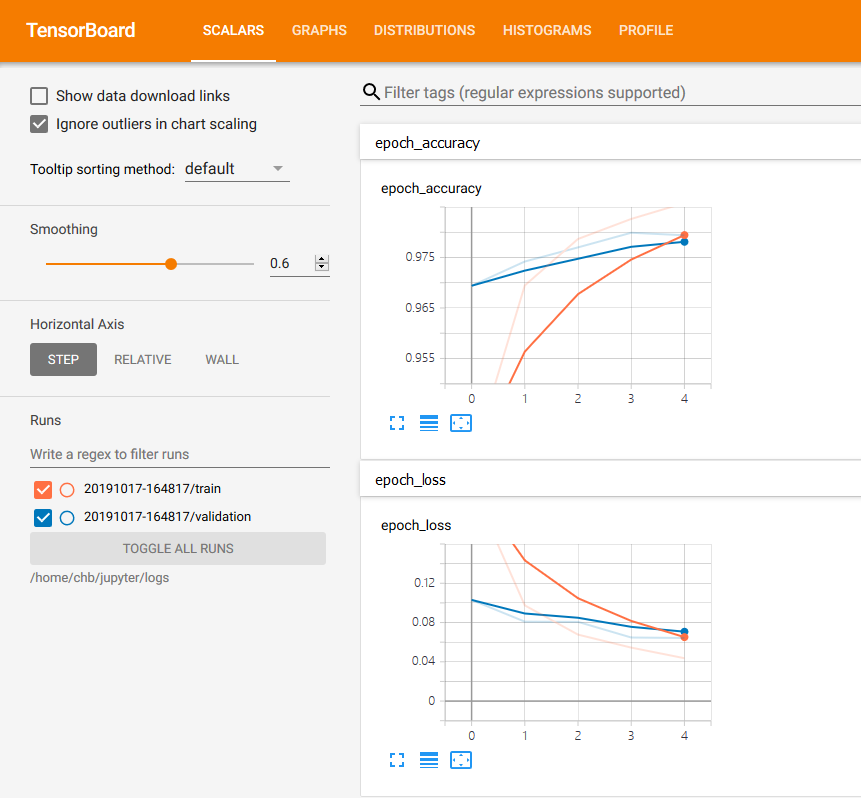

通过TensorBoard提供的图标，我们可以清楚的知道训练模型时loss和accuracy在每一个epoch中是怎么变化的，甚至，在网页菜单栏我们可以看到，TensorBoard提供了查看其他内容的功能：
- 在 scalars 下可以看到 accuracy，cross entropy，dropout，bias，weights 等的趋势。

- 在 images 和 audio 下可以看到输入的数据。

- 在 graphs 中可以看到模型的结构。

- 在 histogram 可以看到 activations，gradients 或者 weights 等变量的每一步的分布，越靠前面就是越新的步数的结果。

- distribution 和 histogram 是两种不同的形式，可以看到整体的状况。

- 在 embedding 中可以看到用 PCA 主成分分析方法将高维数据投影到 3D 空间后的数据的关系。


这就是TensorBoard提供的功能，不可为不强大。这里，我们在介绍一下TensorBoard构造方法中的参数：
工具在Tensorflow中是非常常用的其参数解释如下：

- log_dir：保存TensorBoard要解析的日志文件的目录的路径。
- histogram_freq：频率（在epoch中），计算模型层的激活和权重直方图。如果设置为0，则不会计算直方图。必须为直方图可视化指定验证数据（或拆分）。
- write_graph：是否在TensorBoard中可视化图像。当write_graph设置为True时，日志文件可能会变得非常大。
- write_grads：是否在TensorBoard中可视化渐变直方图。 histogram_freq必须大于0。
- batch_size：用以直方图计算的传入神经元网络输入批的大小。
- write_images：是否在TensorBoard中编写模型权重以显示为图像。
- embeddings_freq：将保存所选嵌入层的频率（在epoch中）。如果设置为0，则不会计算嵌入。要在TensorBoard的嵌入选项卡中显示的数据必须作为embeddings_data传递。
- embeddings_layer_names：要关注的层名称列表。如果为None或空列表，则将监测所有嵌入层。
- embeddings_metadata：将层名称映射到文件名的字典，其中保存了此嵌入层的元数据。如果相同的元数据文件用于所有嵌入层，则可以传递字符串。
- embeddings_data：要嵌入在embeddings_layer_names指定的层的数据。Numpy数组（如果模型有单个输入）或Numpy数组列表（如果模型有多个输入）。
- update_freq：‘batch’或’epoch’或整数。使用’batch’时，在每个batch后将损失和指标写入TensorBoard。这同样适用’epoch’。如果使用整数，比方说1000，回调将会在每1000个样本后将指标和损失写入TensorBoard。请注意，过于频繁地写入TensorBoard会降低您的训练速度。
还有可能引发的异常：
- ValueError：如果设置了histogram_freq且未提供验证数据。


# 3 在其他功能函数中嵌入TensorBoard

在训练模型时，我们可以在 tf.GradientTape()等等功能函数中个性化得通过tf.summary()方法指定需要TensorBoard展示的参数。

同样适用fashion_mnist数据集建立一个模型：

In [15]:
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential ,metrics

In [16]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    return x, y

In [17]:
(x, y), (x_test, y_test) = datasets.fashion_mnist.load_data()
db = tf.data.Dataset.from_tensor_slices((x, y))
db = db.map(preprocess).shuffle(10000).batch(128)
db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.map(preprocess).batch(128)

In [18]:
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),  #  [b, 784]  --> [b, 256]
    layers.Dense(128, activation=tf.nn.relu),  #  [b, 256]  --> [b, 128]
    layers.Dense(64, activation=tf.nn.relu),  #  [b, 128]  --> [b, 64]
    layers.Dense(32, activation=tf.nn.relu),  #  [b, 64]  --> [b, 32]
    layers.Dense(10)  #  [b, 32]  --> [b, 10]
    ]
)
model.build(input_shape=[None,28*28])
model.summary()
optimizer = optimizers.Adam(lr=1e-3)#1e-3
# 指定日志目录
log_dir="/home/chb/jupyter/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
summary_writer = tf.summary.create_file_writer(log_dir)  # 创建日志文件句柄

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             multiple                  200960    
_________________________________________________________________
dense_16 (Dense)             multiple                  32896     
_________________________________________________________________
dense_17 (Dense)             multiple                  8256      
_________________________________________________________________
dense_18 (Dense)             multiple                  2080      
_________________________________________________________________
dense_19 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [19]:

db_iter = iter(db)
images = next(db_iter)
# 必须进行reshape，第一个纬度是图片数量或者说簇大小，28*28是图片大小，1是chanel，因为只灰度图片所以是1
images = tf.reshape(x, (-1, 28, 28, 1))  
with summary_writer.as_default():  # 将第一个簇的图片写入TensorBoard
    tf.summary.image('Training data', images, max_outputs=5, step=0)   # max_outputs设置最大显示图片数量

In [20]:
tf.summary.trace_on(graph=True, profiler=True)
for epoch in range(30):
    train_loss = 0
    train_num = 0
    for step, (x, y) in enumerate(db):

        x = tf.reshape(x, [-1, 28*28])

        with tf.GradientTape() as tape: 
            logits = model(x)
            y_onehot = tf.one_hot(y,depth=10)

            loss_mse = tf.reduce_mean(tf.losses.MSE(y_onehot, logits))
            loss_ce = tf.losses.categorical_crossentropy(y_onehot, logits, from_logits=True)
            
            loss_ce = tf.reduce_mean(loss_ce)  # 计算整个簇的平均loss
        grads = tape.gradient(loss_ce, model.trainable_variables)  # 计算梯度
        optimizer.apply_gradients(zip(grads, model.trainable_variables)) # 更新梯度

        train_loss += float(loss_ce)
        train_num += x.shape[0]
        
    loss = train_loss / train_num  # 计算每一次迭代的平均loss
    with summary_writer.as_default():  # 将loss写入TensorBoard
        tf.summary.scalar('train_loss', train_loss, step=epoch)

    total_correct = 0
    total_num = 0
    for x,y in db_test:  # 用测试集验证每一次迭代后的准确率
        x = tf.reshape(x, [-1, 28*28])
        logits = model(x)
        prob = tf.nn.softmax(logits, axis=1)
        pred = tf.argmax(prob, axis=1)
        pred = tf.cast(pred, dtype=tf.int32)
        correct = tf.equal(pred, y)
        correct = tf.reduce_sum(tf.cast(correct, dtype=tf.int32))

        total_correct += int(correct)
        total_num += x.shape[0]
    acc = total_correct / total_num  # 平均准确率
    with summary_writer.as_default():  # 将acc写入TensorBoard
        tf.summary.scalar('test_acc', acc, step=epoch)
    print(epoch, 'train_loss:',loss,'test_acc:', acc)

0 train_loss: 0.004282377735277017 test_acc: 0.8435
1 train_loss: 0.0029437638364732265 test_acc: 0.8635
2 train_loss: 0.0025979293311635654 test_acc: 0.858
3 train_loss: 0.0024499946276346843 test_acc: 0.8698
4 train_loss: 0.0022926158788303536 test_acc: 0.8777
5 train_loss: 0.002190616005907456 test_acc: 0.8703
6 train_loss: 0.0020421392366290095 test_acc: 0.8672
7 train_loss: 0.001972314653545618 test_acc: 0.8815
8 train_loss: 0.0018821696805457274 test_acc: 0.882
9 train_loss: 0.0018143038821717104 test_acc: 0.8874
10 train_loss: 0.0017742110469688972 test_acc: 0.8776
11 train_loss: 0.0017088291154553493 test_acc: 0.8867
12 train_loss: 0.0016564140267670154 test_acc: 0.8883
13 train_loss: 0.001609446036318938 test_acc: 0.8853
14 train_loss: 0.0015313156222303709 test_acc: 0.8939
15 train_loss: 0.0014887714397162199 test_acc: 0.8793
16 train_loss: 0.001450310030952096 test_acc: 0.8853
17 train_loss: 0.001389076333368818 test_acc: 0.892
18 train_loss: 0.0013547154798482855 test_acc: 

TensorBoard中web界面如下：

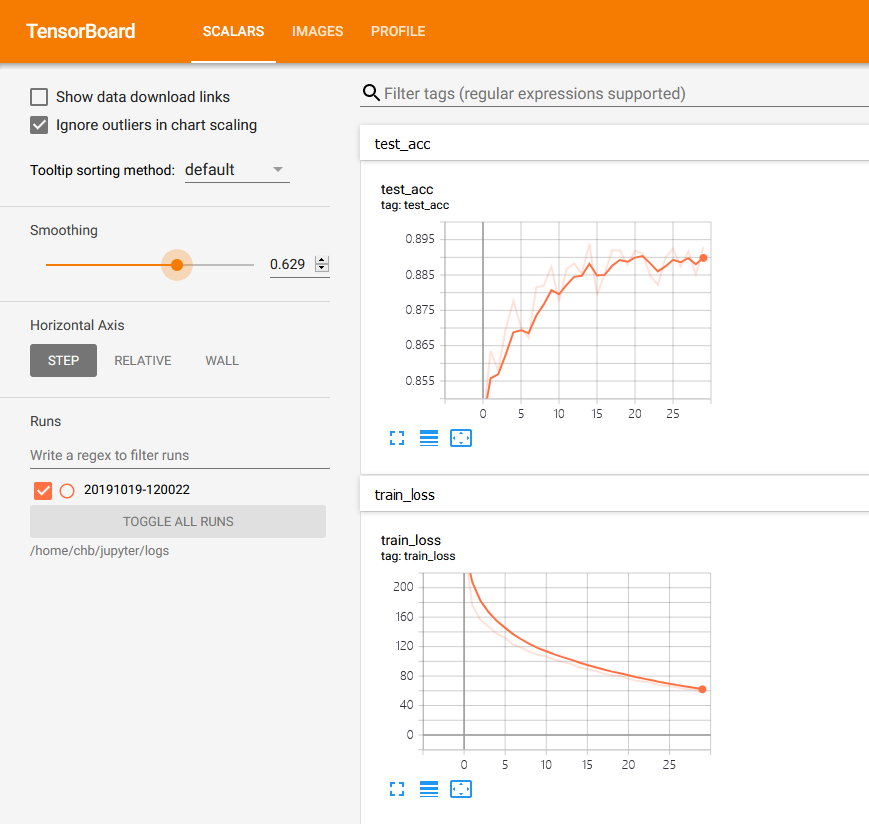

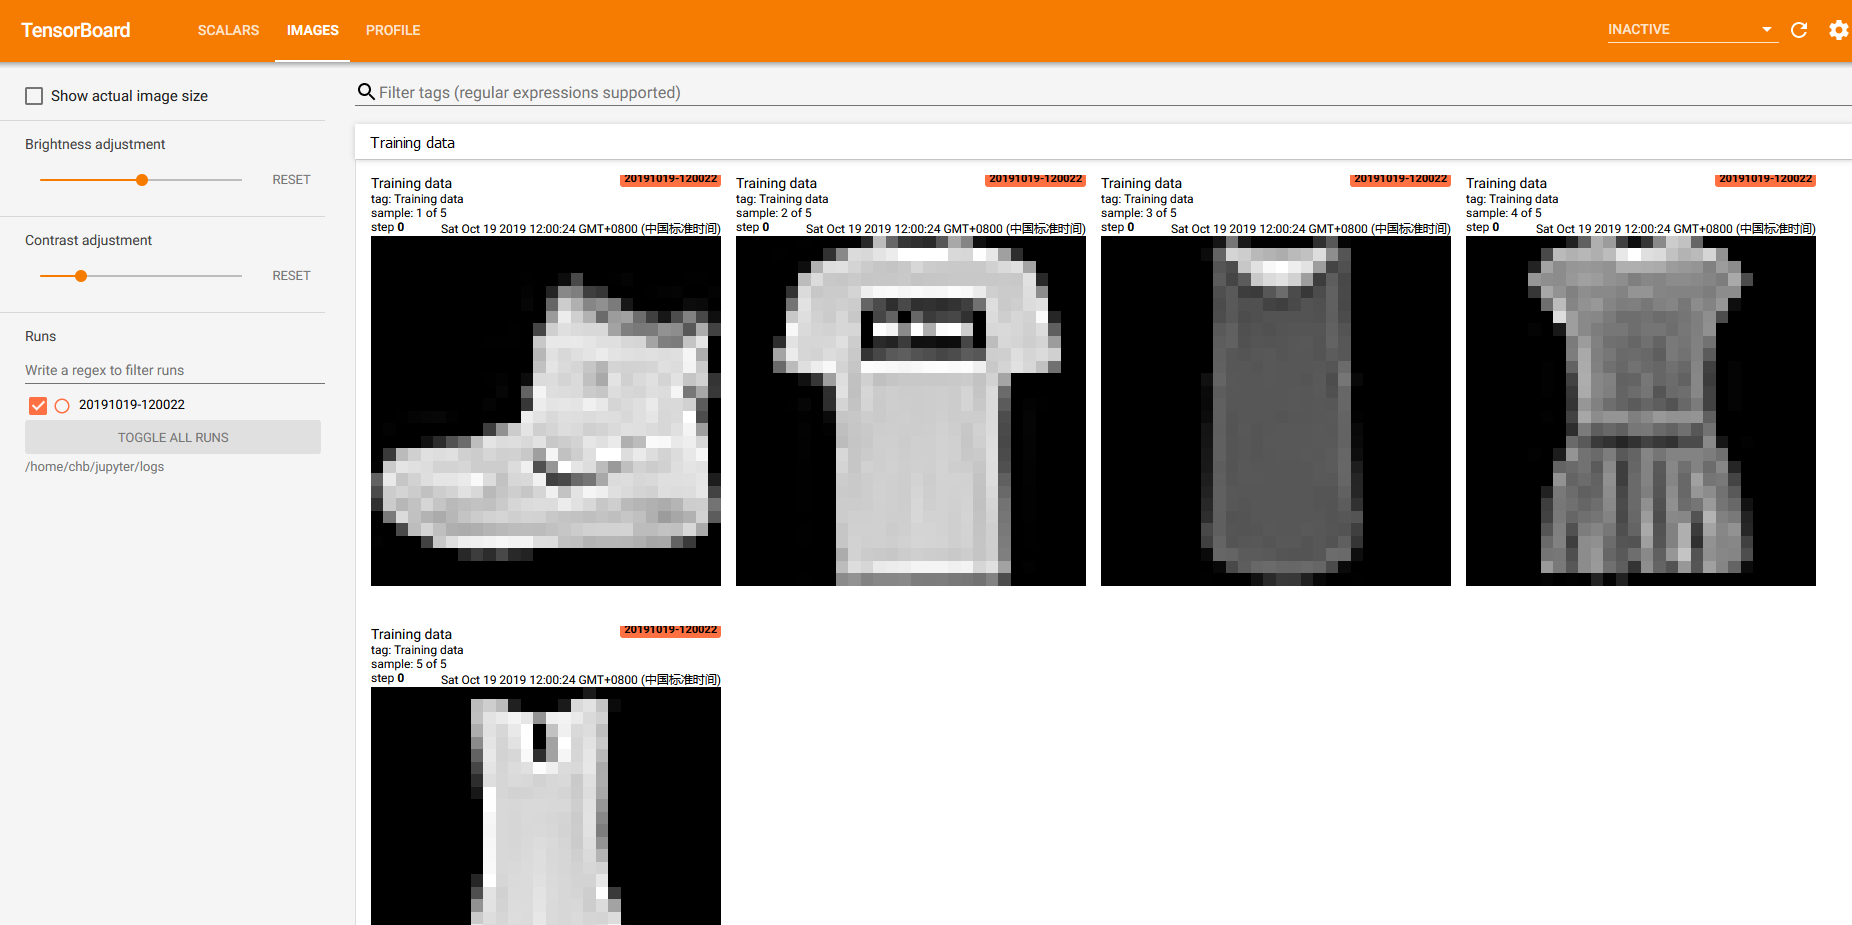

除了上述示例中使用过的scalar、image之外，summary模块还提供了替他数据嵌入TensorBoard方法：

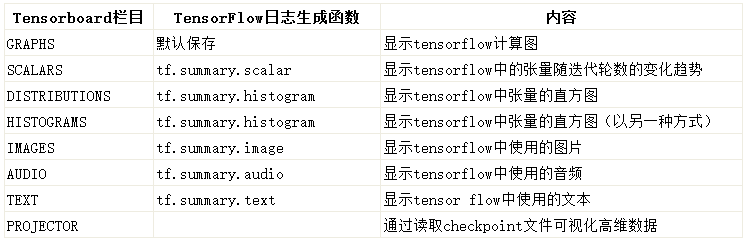

**参考**

https://tensorflow.google.cn/tensorboard/get_started

http://www.imooc.com/article/49359

https://www.jianshu.com/p/7f728730c488

https://blog.csdn.net/z_feng12489/article/details/89920398#_103